In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Dataset
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


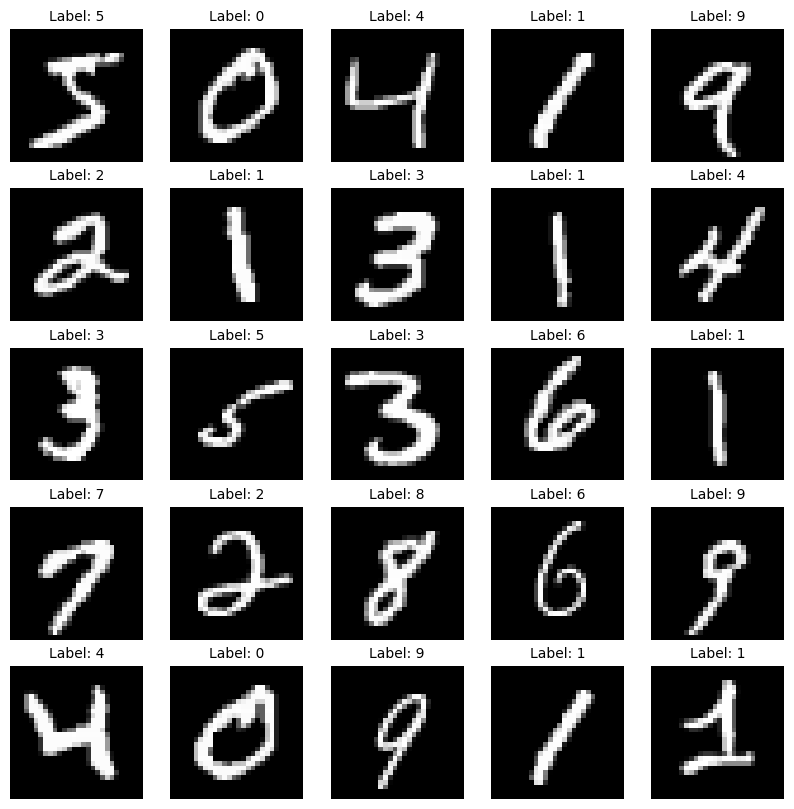

In [4]:
# Displaying few images in plot
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {y_train[i]}', fontsize=10)
plt.show()

In [5]:
# Normalizing the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Building the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=x_train.shape[1:], name='input'),
    keras.layers.Dense(128, activation='relu', name='layer1'),
    keras.layers.Dense(64, activation='relu', name='layer2'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

# Compiling the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Training the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.7028 - loss: 1.0469 - val_accuracy: 0.9132 - val_loss: 0.3124
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.9113 - loss: 0.3132 - val_accuracy: 0.9297 - val_loss: 0.2457
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.9283 - loss: 0.2489 - val_accuracy: 0.9411 - val_loss: 0.2096
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.9391 - loss: 0.2121 - val_accuracy: 0.9471 - val_loss: 0.1888
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.9495 - loss: 0.1783 - val_accuracy: 0.9500 - val_loss: 0.1694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.9537 - loss: 0.1627 - val_accuracy: 0.9540 - val_loss: 0.1529
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.9593 - loss: 0.1429 - val_accuracy: 0.9579 - val_loss: 0.1437
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.9632 -

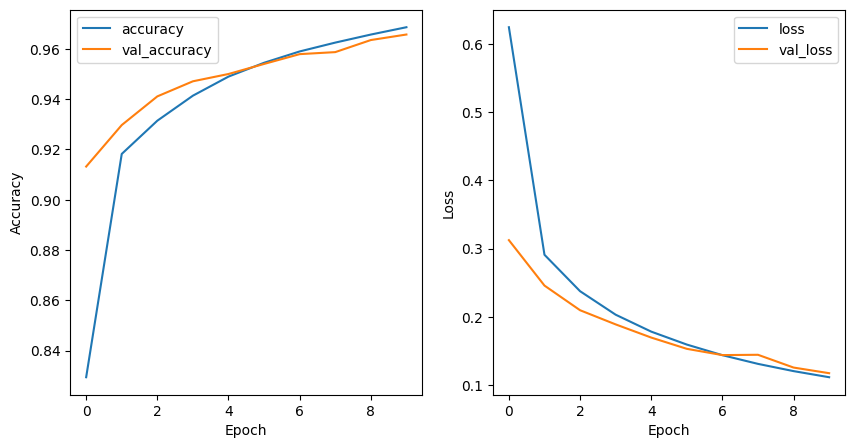

In [9]:
# Plotting the accuracy and loss
plt.figure(figsize=(10, 5))

# Accuracy and loss
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.9609 - loss: 0.1344


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


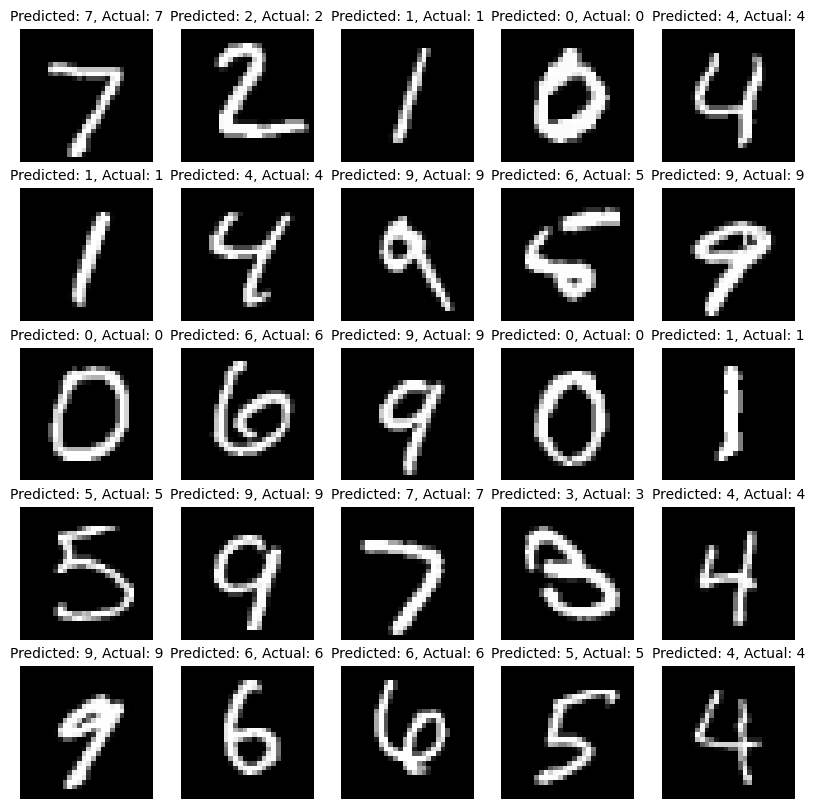

In [11]:
# Predicting the images
predictions = model.predict(x_test)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}', fontsize=10)
plt.show()